In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('data_allclean.csv')
print(data.columns)

Index(['speed_limit', 'urban_or_rural_area', 'traffic_flow', 'accident_rate',
       'population_density', 'mean_income_of_tax_payers',
       'Road_Network_Density', 'Signal_Count', 'Driving_Distance'],
      dtype='object')


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22064 entries, 0 to 22063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   speed_limit                22064 non-null  int64  
 1   urban_or_rural_area        22064 non-null  int64  
 2   traffic_flow               22064 non-null  int64  
 3   accident_rate              22064 non-null  float64
 4   population_density         22064 non-null  float64
 5   mean_income_of_tax_payers  22064 non-null  int64  
 6   Road_Network_Density       22064 non-null  float64
 7   Signal_Count               22064 non-null  int64  
 8   Driving_Distance           22064 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


In [12]:
data = pd.get_dummies(data, columns=['urban_or_rural_area'], drop_first=True)


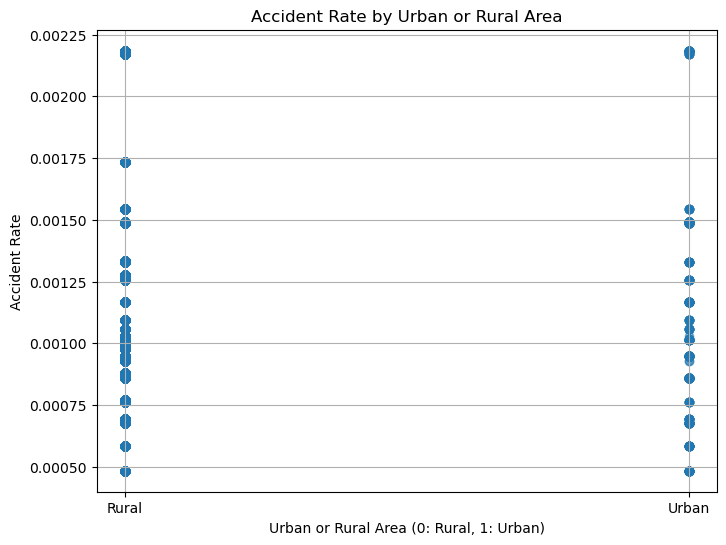

In [19]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(data['urban_or_rural_area_2'], data['accident_rate'], alpha=0.5)
plt.xlabel('Urban or Rural Area (0: Rural, 1: Urban)')
plt.ylabel('Accident Rate')
plt.title('Accident Rate by Urban or Rural Area')
plt.xticks([0, 1], ['Rural', 'Urban'])  # 将布尔值显示为分类标签
plt.grid(True)
plt.show()


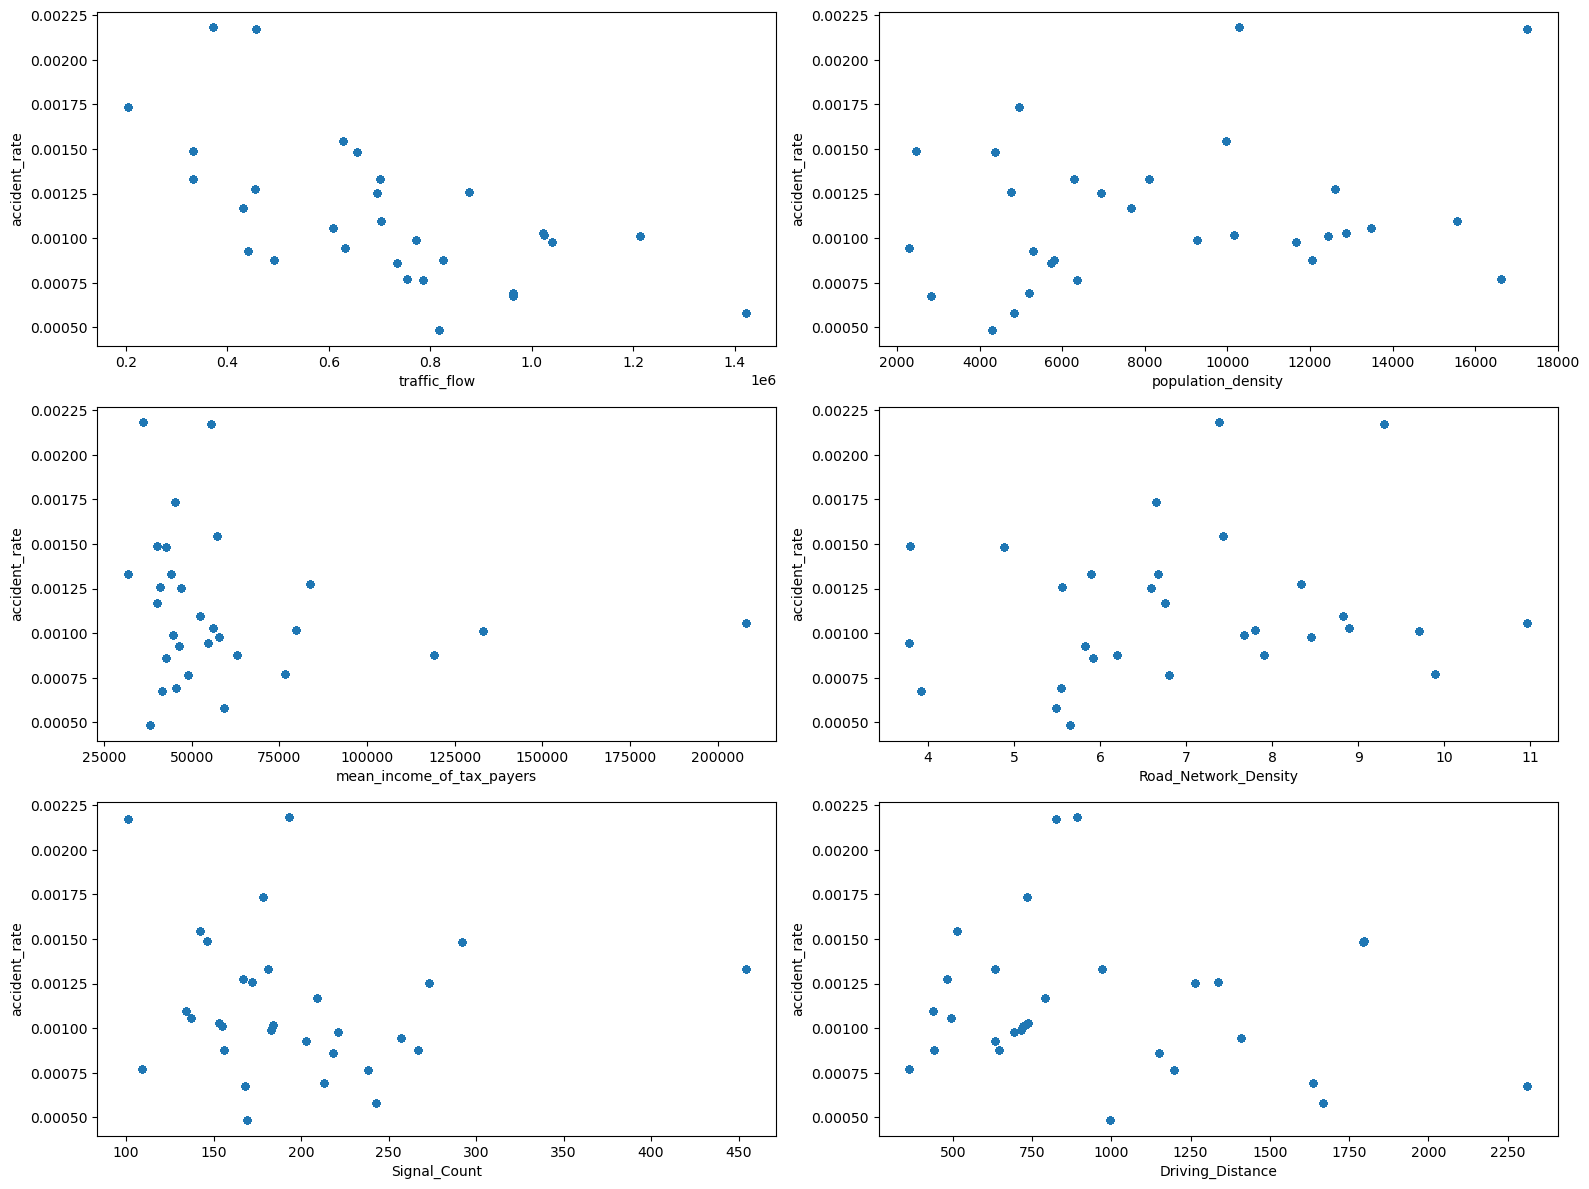

In [23]:
# visualize the relationship between the features and the response using scatterplots

import matplotlib.pyplot as plt

# 创建3行3列的子图网格，总共可以容纳9个子图
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))  # 调整高度为12
axs = axs.flatten()  # 将二维数组展平为一维数组，方便索引

# 绘制散点图

data.plot(kind='scatter', x='traffic_flow', y='accident_rate', ax=axs[0])
data.plot(kind='scatter', x='population_density', y='accident_rate', ax=axs[1])
data.plot(kind='scatter', x='mean_income_of_tax_payers', y='accident_rate', ax=axs[2])
data.plot(kind='scatter', x='Road_Network_Density', y='accident_rate', ax=axs[3])
data.plot(kind='scatter', x='Signal_Count', y='accident_rate', ax=axs[4])
data.plot(kind='scatter', x='Driving_Distance', y='accident_rate', ax=axs[5])


# 调整布局，防止图形重叠
plt.tight_layout()

# 显示图形
plt.show()




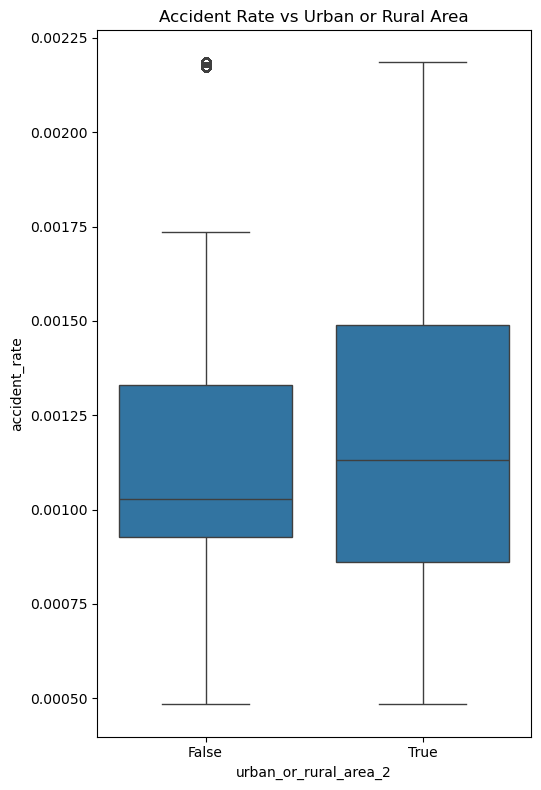

In [24]:
# 设置图形大小
plt.figure(figsize=(10, 8))

# 1. 合并箱型图
plt.subplot(1, 2, 1)  # 一行两列，选择第一个位置
# 绘制 `urban_or_rural_area` 与 `accident_rate` 的箱型图
sns.boxplot(x='urban_or_rural_area_2', y='accident_rate', data=data)
plt.title("Accident Rate vs Urban or Rural Area")


# 显示箱型图
plt.tight_layout()
plt.show()

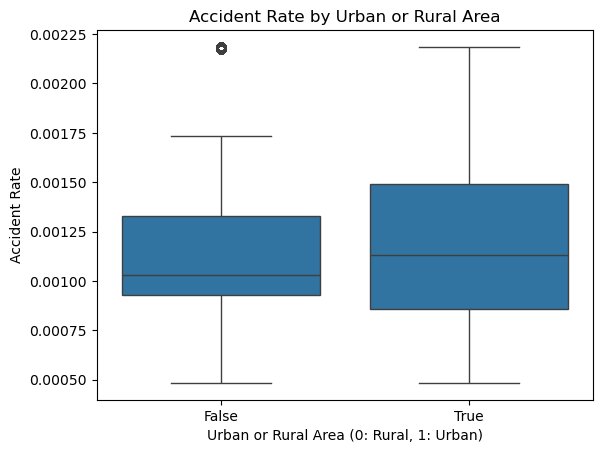

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设数据在一个 DataFrame 中
sns.boxplot(x='urban_or_rural_area_2', y='accident_rate', data=data)
plt.xlabel('Urban or Rural Area (0: Rural, 1: Urban)')
plt.ylabel('Accident Rate')
plt.title('Accident Rate by Urban or Rural Area')
plt.show()


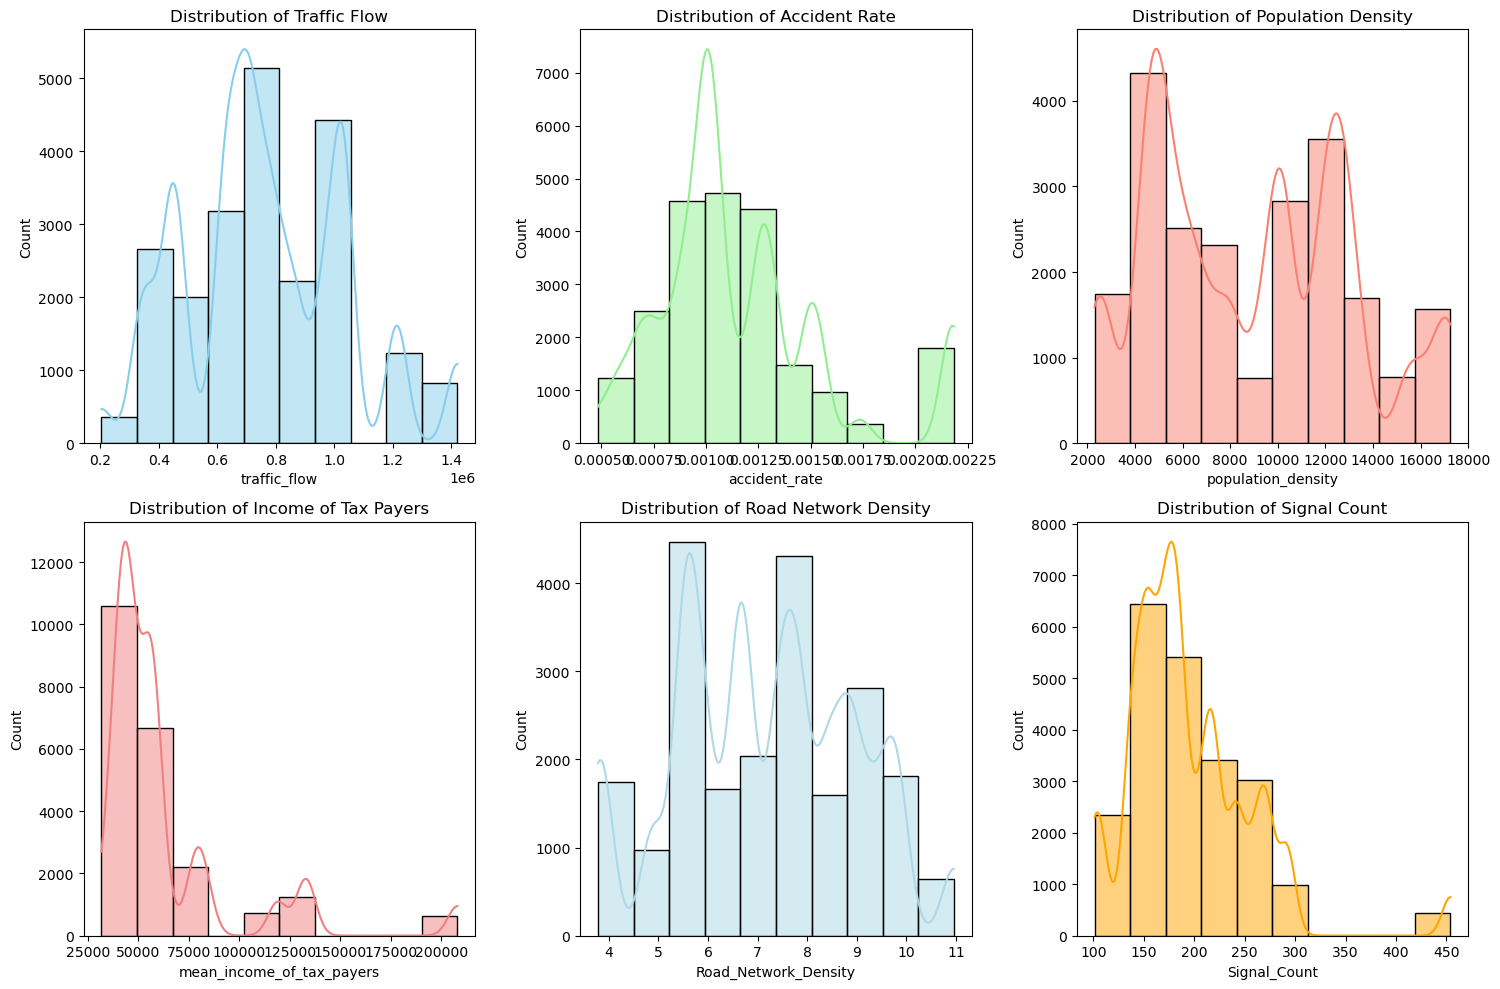

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设数据已经加载在data中
# 绘制多个变量的分布图

plt.figure(figsize=(15, 10))

# 绘制 `traffic_flow` 的分布图
plt.subplot(2, 3, 1)
sns.histplot(data['traffic_flow'], kde=True, bins=10,color='skyblue')
plt.title('Distribution of Traffic Flow')

# 绘制 `accident_rate` 的分布图
plt.subplot(2, 3, 2)
sns.histplot(data['accident_rate'], kde=True,bins=10, color='lightgreen')
plt.title('Distribution of Accident Rate')

# 绘制 `population_density` 的分布图
plt.subplot(2, 3, 3)
sns.histplot(data['population_density'], kde=True,bins=10, color='salmon')
plt.title('Distribution of Population Density')

# 绘制 `mean_income_of_tax_payers` 的分布图
plt.subplot(2, 3, 4)
sns.histplot(data['mean_income_of_tax_payers'], kde=True,bins=10, color='lightcoral')
plt.title('Distribution of Income of Tax Payers')

# 绘制 `Road_Network_Density` 的分布图
plt.subplot(2, 3, 5)
sns.histplot(data['Road_Network_Density'], kde=True,bins=10, color='lightblue')
plt.title('Distribution of Road Network Density')

# 绘制 `Signal_Count` 的分布图
plt.subplot(2, 3, 6)
sns.histplot(data['Signal_Count'], kde=True,bins=10, color='orange')
plt.title('Distribution of Signal Count')

# 调整布局
plt.tight_layout()
plt.show()

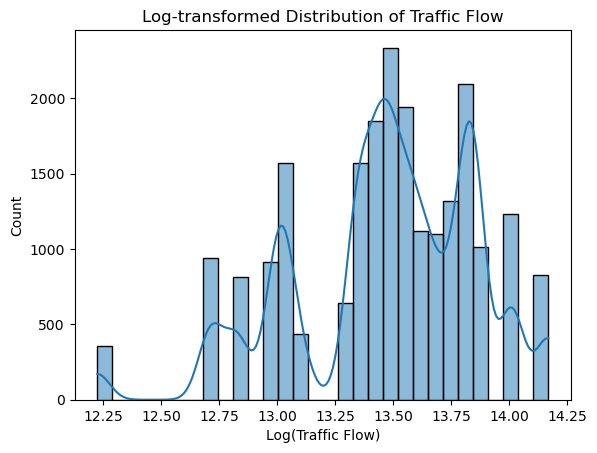

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 对数变换
data['traffic_flow_log'] = np.log(data['traffic_flow'])

# 绘制对数变换后的分布图
sns.histplot(data['traffic_flow_log'], kde=True, bins=30)
plt.title('Log-transformed Distribution of Traffic Flow')
plt.xlabel('Log(Traffic Flow)')
plt.ylabel('Count')
plt.show()

Box-Cox lambda: 0.6115343750850534


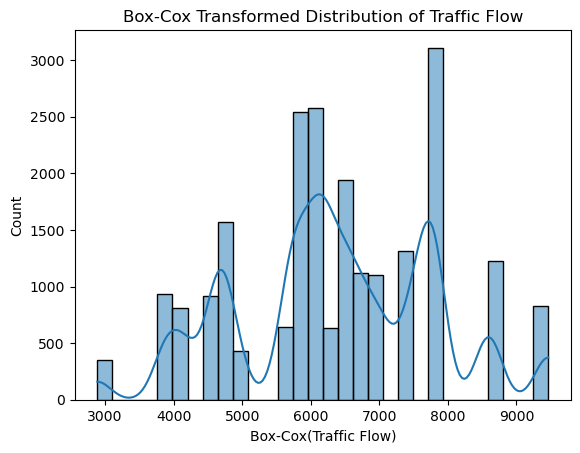

In [28]:
from scipy.stats import boxcox

# Box-Cox 变换（数据中不能有零或负值）
data['traffic_flow_boxcox'], lmbda = boxcox(data['traffic_flow'])
print(f"Box-Cox lambda: {lmbda}")

# 绘制 Box-Cox 变换后的分布图
sns.histplot(data['traffic_flow_boxcox'], kde=True, bins=30)
plt.title('Box-Cox Transformed Distribution of Traffic Flow')
plt.xlabel('Box-Cox(Traffic Flow)')
plt.ylabel('Count')
plt.show()


In [29]:
# 剔除上限和下限之外的异常值
data = data[data['traffic_flow'] < data['traffic_flow'].quantile(0.99)]  # 去除上位1%异常值
data = data[data['traffic_flow'] > data['traffic_flow'].quantile(0.01)]  # 去除下位1%异常值


Box-Cox lambda: 0.7171983970723925


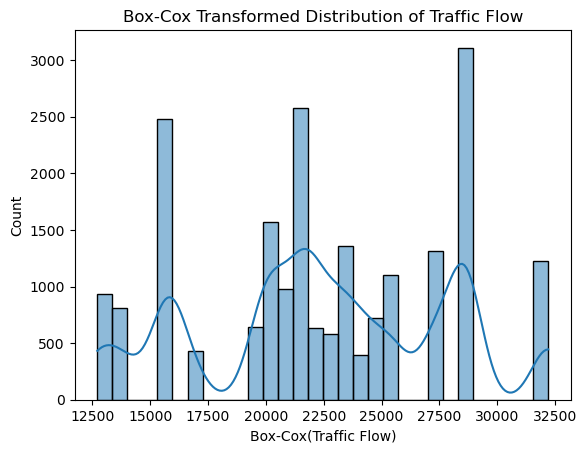

In [31]:
from scipy.stats import boxcox

# Box-Cox 变换（数据中不能有零或负值）
data['traffic_flow_boxcox'], lmbda = boxcox(data['traffic_flow'])
print(f"Box-Cox lambda: {lmbda}")

# 绘制 Box-Cox 变换后的分布图
sns.histplot(data['traffic_flow_boxcox'], kde=True, bins=30)
plt.title('Box-Cox Transformed Distribution of Traffic Flow')
plt.xlabel('Box-Cox(Traffic Flow)')
plt.ylabel('Count')
plt.show()